# 思路
为了解决从深圳到西安的最优路线问题，我采用以下步骤：

    ​​问题建模​​：将城市视为图的顶点，城市间的运输时间视为边的权重，建立带权重的有向图。

    ​​算法选择​​：使用​​Dijkstra算法​​，适用于在非负权重图中查找单源最短路径（本例中源点是"深圳"，目标是"西安"）。算法核心是：
        维护一个优先队列（最小堆）来选择当前距离最短的节点
        每次扩展节点时更新邻接节点的最短距离和前驱节点

    ​​路径回溯​​：算法结束后，从目标节点"西安"回溯到源点"深圳"，得到完整路径。

    ​​图形化展示​​：使用NetworkX库可视化城市图和最短路径，用不同颜色突出显示最短路径。


Big荔枝最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝运输总时间: 20.0 小时


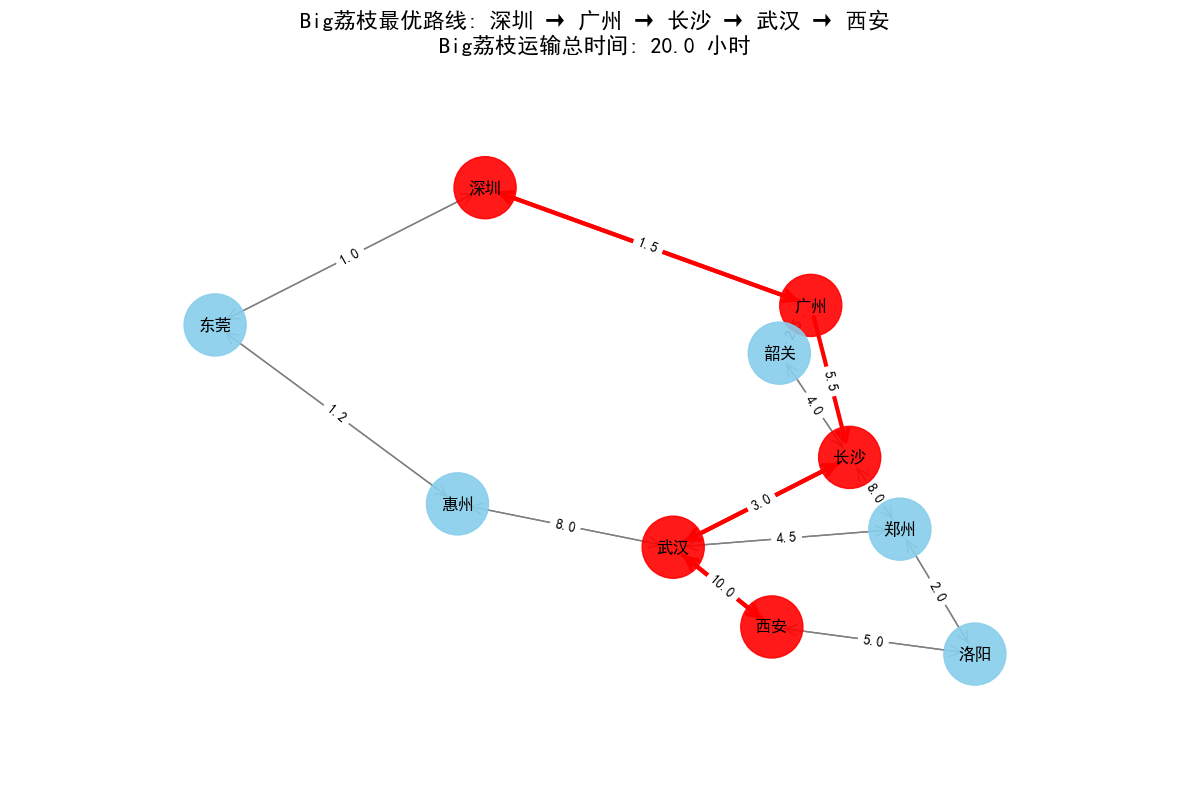

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# 城市图数据
city_graph = {
    '深圳': {'广州': 1.5, '东莞': 1.0},
    '广州': {'深圳': 1.5, '韶关': 2.5, '长沙': 5.5},
    '东莞': {'深圳': 1.0, '惠州': 1.2},
    '惠州': {'东莞': 1.2, '武汉': 8.0},
    '韶关': {'广州': 2.5, '长沙': 4.0},
    '长沙': {'韶关': 4.0, '武汉': 3.0, '郑州': 8.0},
    '武汉': {'惠州': 8.0, '长沙': 3.0, '郑州': 4.5, '西安': 10.0},
    '郑州': {'长沙': 8.0, '武汉': 4.5, '洛阳': 2.0},
    '洛阳': {'郑州': 2.0, '西安': 5.0},
    '西安': {'武汉': 10.0, '洛阳': 5.0}
}

def dijkstra(graph, start, end):
    # 初始化所有节点距离为无穷大
    distances = {city: float('inf') for city in graph}
    distances[start] = 0  # 源点距离设为0
    prev_nodes = {city: None for city in graph}  # 记录前驱节点
    
    # 优先队列：(距离, 城市)
    pq = [(0, start)]
    
    while pq:
        curr_dist, curr_city = heapq.heappop(pq)
        
        # 如果当前距离大于已记录距离，跳过
        if curr_dist > distances[curr_city]:
            continue
        
        # 遍历邻接城市
        for neighbor, weight in graph[curr_city].items():
            distance = curr_dist + weight
            # 发现更短路径时更新
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev_nodes[neighbor] = curr_city
                heapq.heappush(pq, (distance, neighbor))
    
    # 回溯构建路径
    path = []
    curr = end
    while curr:
        path.append(curr)
        curr = prev_nodes[curr]
    path.reverse()
    
    return distances[end], path

def plot_path(graph, path, total_cost):
    G = nx.DiGraph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(city, neighbor, weight=weight)
    
    # 设置布局
    pos = nx.spring_layout(G, seed=42)
    
    # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]
    
    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制图
    plt.figure(figsize=(12, 8))
    
    # 绘制节点和边
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)
    
    # 添加节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # 添加边的权重标签
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # 设置标题
    plt.title(f"Big荔枝最优路线: {' → '.join(path)}\nBig荔枝运输总时间: {total_cost} 小时", fontsize=16)
    
    # 显示网格并调整边界
    plt.axis('off')
    plt.margins(0.2)
    plt.tight_layout()
    plt.show()

# 计算最短路径
if __name__ == "__main__":
    start_city = "深圳"
    end_city = "西安"
    
    total_cost, optimal_path = dijkstra(city_graph, start_city, end_city)
    
    # 打印结果
    print(f"Big荔枝最优路径: {' → '.join(optimal_path)}")
    print(f"Big荔枝运输总时间: {total_cost} 小时")
    
    # 图形化展示
    #解决 matplotlib 中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plot_path(city_graph, optimal_path, total_cost)

# 优化 

从深圳到西安的最优路径：
总运输时间: 20.0 小时
最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安


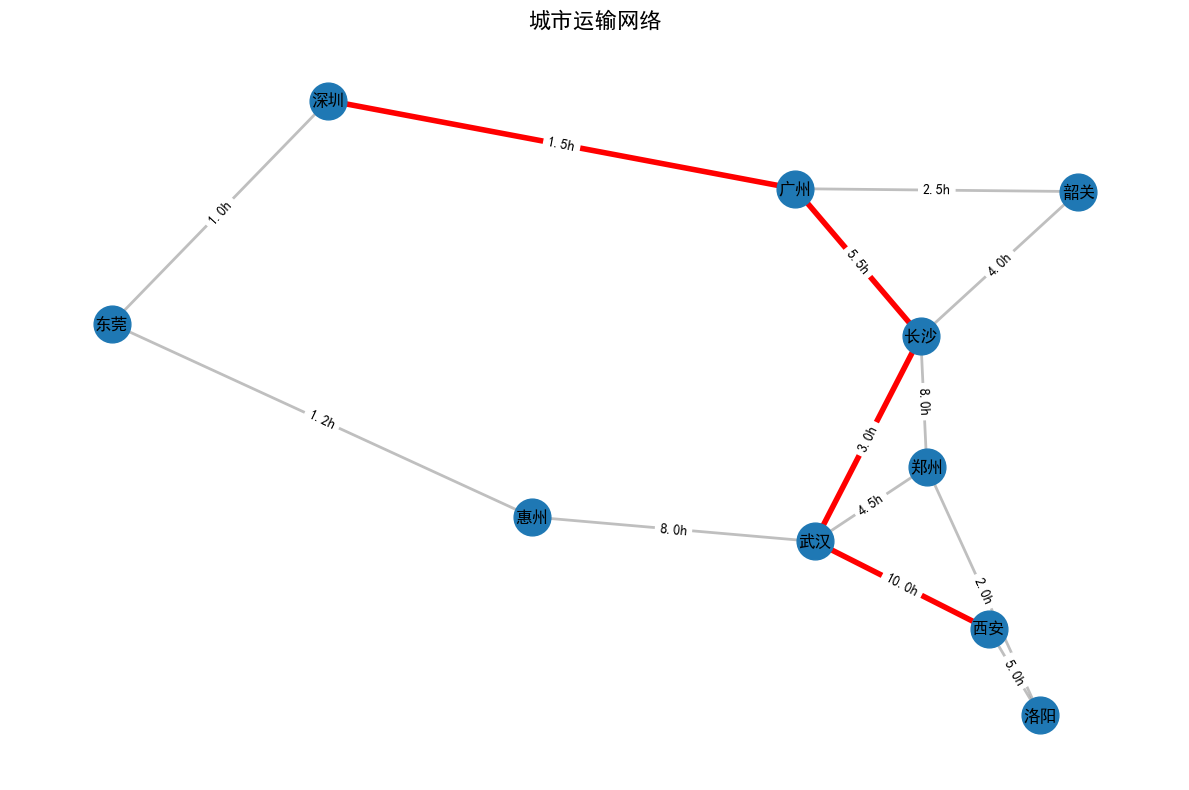

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# 城市图数据，包含运输时间
city_graph = {
    '深圳': {'广州': 1.5, '东莞': 1.0},
    '广州': {'深圳': 1.5, '韶关': 2.5, '长沙': 5.5},
    '东莞': {'深圳': 1.0, '惠州': 1.2},
    '惠州': {'东莞': 1.2, '武汉': 8.0},
    '韶关': {'广州': 2.5, '长沙': 4.0},
    '长沙': {'韶关': 4.0, '武汉': 3.0, '郑州': 8.0},
    '武汉': {'惠州': 8.0, '长沙': 3.0, '郑州': 4.5, '西安': 10.0},
    '郑州': {'长沙': 8.0, '武汉': 4.5, '洛阳': 2.0},
    '洛阳': {'郑州': 2.0, '西安': 5.0},
    '西安': {'武汉': 10.0, '洛阳': 5.0}
}

def dijkstra(graph, start, end):
    """
    使用Dijkstra算法计算最优路径
    :param graph: 城市图
    :param start: 起点
    :param end: 终点
    :return: 总代价，最优路径
    """
    # 初始化距离字典，存储从起点到各个节点的最小代价
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # 初始化前驱节点字典，用于记录路径
    predecessors = {node: None for node in graph}
    
    # 初始化优先队列
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # 如果到达终点，结束搜索
        if current_node == end:
            break
            
        # 如果当前距离大于已记录的最小距离，跳过
        if current_distance > distances[current_node]:
            continue
            
        # 遍历当前节点的所有邻居
        for neighbor, time in graph[current_node].items():
            # 计算从起点到邻居的新距离
            distance = current_distance + time
            
            # 如果新距离更小，更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    
    # 构建路径
    path = []
    current_node = end
    
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    
    # 反转路径，使其从起点到终点
    path.reverse()
    
    return distances[end], path

def visualize_graph(graph, path=None):
    """可视化城市图和最优路径"""
    G = nx.Graph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        G.add_node(city)
        for neighbor, time in neighbors.items():
            G.add_edge(city, neighbor, weight=time)
    
    # 绘制图形
    plt.figure(figsize=(12, 8))
    
    # 计算节点位置
    pos = nx.spring_layout(G, seed=42)
    
    
      # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]

    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)    
    
    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei')
    
    # 绘制边标签（运输时间）
    edge_labels = {(u, v): f"{d['weight']}h" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.axis('off')
    plt.title('Big荔枝城市运输网络', fontsize=16, fontfamily='SimHei')
    plt.tight_layout()
    plt.show()

def main():
    # 计算从深圳到西安的最优路径
    total_time, path = dijkstra(city_graph, '深圳', '西安')
    
    # 输出结果
    print("Big荔枝最优路径:", " → ".join(path))
    print(f"Big荔枝总运输时间: {total_time} 小时")
    
    # 可视化结果
    visualize_graph(city_graph, path)

if __name__ == "__main__":
    main()